In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(777)
print(tf.__version__)

2.1.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', ' Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

4423680/4422102 [==============================] - 1s 0us/step


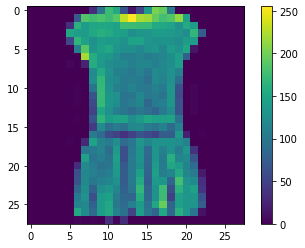

In [3]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

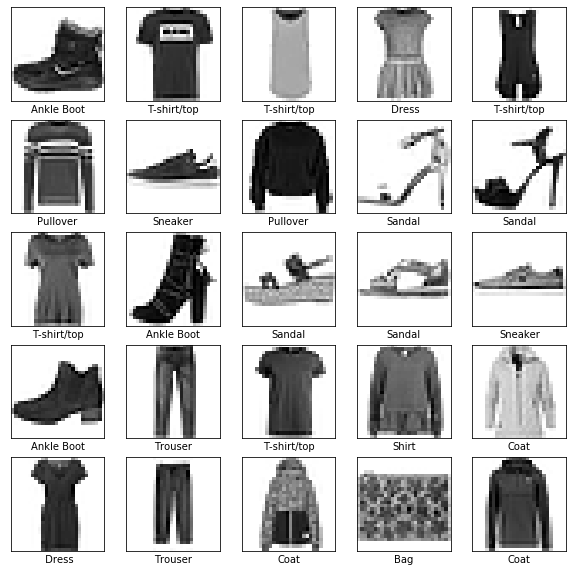

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5041 - accuracy: 0.8230
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3776 - accuracy: 0.8649
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3368 - accuracy: 0.8775
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3133 - accuracy: 0.8841
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2962 - accuracy: 0.8909


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3620 - accuracy: 0.8695
Test accuracy: 0.8695
